In [38]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# NIE lens model

The Non-singular Isothermal Ellipsoid have a surface density given by
$$
\Sigma(\vec \xi)=\frac{\sigma^2}{2G}\frac{\sqrt{f}}{\sqrt{\xi_1^2+f^2\xi_2^2+\xi_c^2}}
$$

Using the dimensionless notation, the corresponding convergence is 
$$
\kappa(\vec x)=\frac{\sqrt{f}}{2\sqrt{x_1^2+f^2x_2^2+x_c^2}}
$$

The possible topologies of the critical lines and caustics are discussed by Kormann et al. (1994). In particular, they show that:

* if $x_c<f^{3/2}/2$ there are two distinguished critical lines and caustics. One caustic is the tangential caustic and has four cusps. The other is the radial one and it has not cusps. The tangential caustic is completely contained within the radial caustic if the ellipticity is small ($f$ is large). Even in the case of mildly elliptical lenses, the radial caustic contains the tangential caustic if the core is small enough;
* if $f^{3/2}/2<x_c<f^{3/2}/(1+f)$, the radial caustic is contained within the tangential caustic. In addition both the radial and the tangential caustics have only two cusps;
* if $f^{3/2}/(1+f)<x_c<f^{1/2}/(1+f)$, the lens has only a tangential critical line and caustic. The radial critical lines and caustics disappear for $x_c=f^{3/2}/(1+f)$;
* even the tangential caustic disappears if $x_c=f^{1/2}/(1+f)$. Thus, for $x_c>f^{1/2}/(1+f)$ the lens does not have critical lines and caustics.

In order to study the properties of these lenses, we use the module ```mynewdeflector``` (see ```mynewdeflector.py```). In short: we use a convergence map to generate a deflector, whose potential is computed by solving a 2D poisson equation. All properties of the lens are then derived by means of the first and second derivatives of the potential.

1024 1024 <class 'numpy.ndarray'>


Text(0.5, 1.0, 'potential')

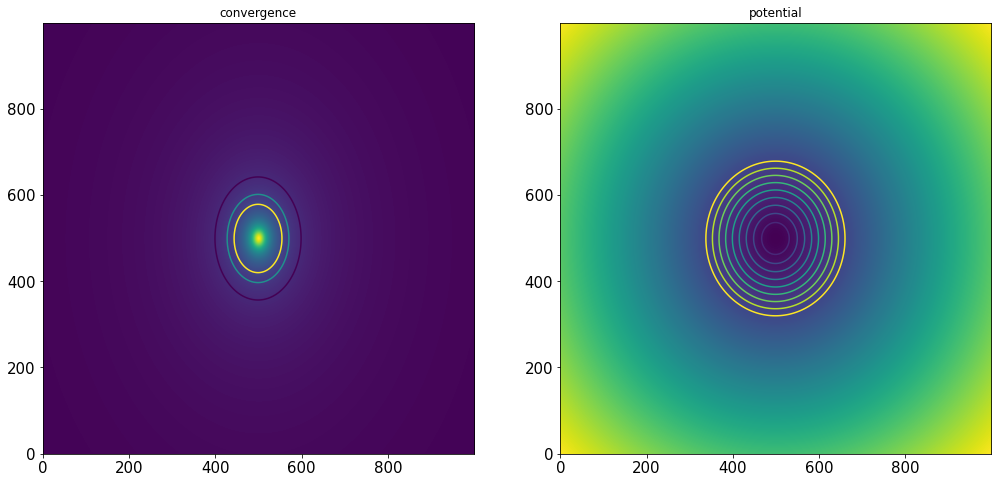

In [39]:
from mynewdeflector import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm
%matplotlib inline

def kappa_nie(xk,yk,f,xc):    
    x1,x2=np.meshgrid(xk,yk)
    mappa=np.sqrt(f)/2.0/np.sqrt(x1**2+f**2*x2**2+xc**2)
    return(mappa)

f=0.7
xc=0.1
npix=1024
xmin=-5.0
xmax=-xmin
ymin=xmin
ymax=xmax
x1=np.linspace(xmin,xmax,npix)
x2=np.linspace(xmin,xmax,npix)
kappa=kappa_nie(x1,x2,f,xc)
cdelt=(np.max(x1)-np.min(x1))/(npix-1.0)

df=deflector_from_map(kappa=kappa,pixel=cdelt,pad=True,npix=1000,size=8.0)

kappa=df.convergence()
pot=df.pot

fig,ax = plt.subplots(1,2,figsize=(17,8))
ax[0].imshow(kappa,origin="lower")
ax[0].contour(kappa,levels=[0.5,0.7,0.9])
ax[0].set_title('convergence')
ax[1].imshow(pot,origin="lower")
ax[1].contour(pot,levels=np.linspace(np.min(pot),np.min(pot)+1,10))
ax[1].set_title('potential')

The following shows the critical lines and caustics.

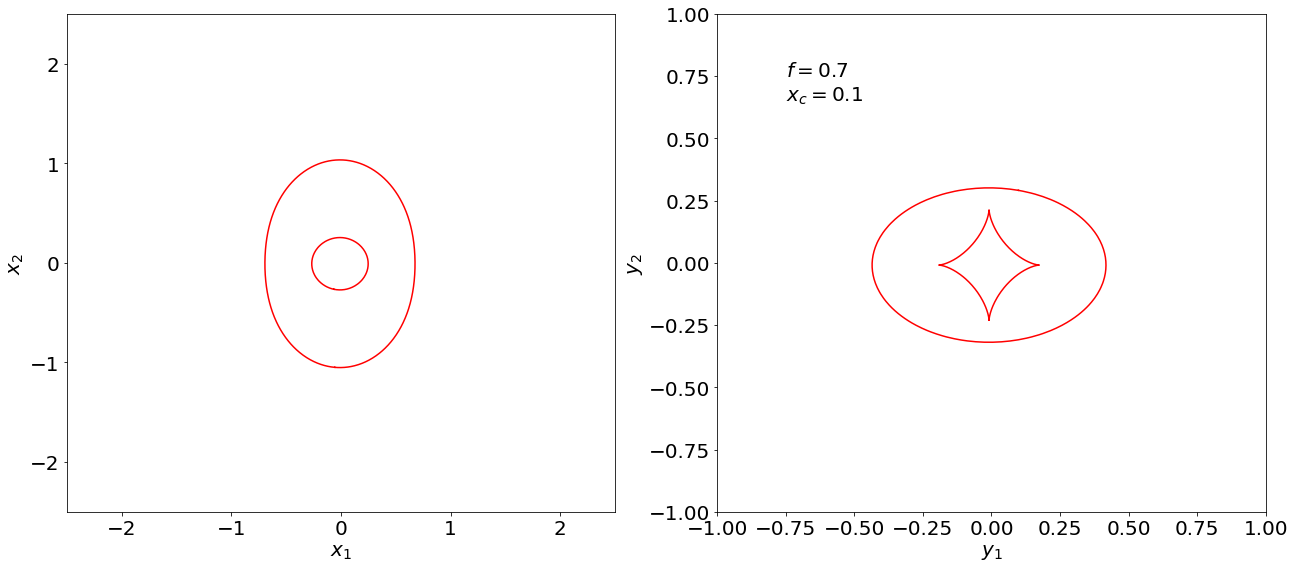

In [40]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
df.clines(ax=ax[0])
df.caustics(ax=ax[1])
        
ax[1].set_xlim([-1,1])
ax[1].set_ylim([-1,1])
ax[0].set_xlim([-2.5,2.5])
ax[0].set_ylim([-2.5,2.5])
                      
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)

ax[1].text(-0.75,0.75,'$f=$'+str(f),fontsize=20)
ax[1].text(-0.75,0.65,'$x_c=$'+str(xc),fontsize=20)
plt.tight_layout()

# Pseudo Elliptical Lenses

Pseudo-elliptical lenses are generally referred as lenses whose iso-potential contours are elliptical and have constant axis ratio $f$. 

Let us consider a circular symmetric potential $\Psi(x)$, where $x$ is, as usual, the distance from the center of the lens in dimensionless units. As previously done for the surface density, curves of constant potential on the lens plane can be transformed into ellipses by making the substitution
$$
    x \rightarrow x = \sqrt{x_1^2+f^2x_2^2} \;. 
$$
The resulting iso-potential contours are ellipses with minor axis $x$ and major axis $x/f$, with their major axes aligned the $x_2$ axis.

The great advantage of introducing the ellipticity in the potential rather in the projected density is that all lens properties can be obtained more easily by means of derivatives of circular-symmetric quantities. For example, the components of the deflection angle are
$$
\alpha_1(\vec x) = \frac{\partial \Psi(x)}{\partial x_1} = \Psi'(x)\frac{\partial x}{\partial x_1} = \tilde\alpha(x)\frac{\partial x}{\partial x_1} \nonumber \;,
$$
$$
\alpha_2(\vec x) = \frac{\partial \Psi(x)}{\partial x_2} = \Psi'(x)\frac{\partial x}{\partial x_2} = \tilde\alpha(x)\frac{\partial x}{\partial x_2} \;.
$$
where $\tilde\alpha(x)$ is the deflection angle of the circular symmetric lens whose potential is $\Psi(x)$.
Convergence and shear are linear combinations of the second derives of the lensing potential, or, equivalently, of the first derivatives of the components of the deflection angle:
$$
\Psi_{11}(\vec x) = \frac{\partial \alpha_1(\vec x)}{\partial x_1} = \tilde\alpha'(x)\left(\frac{\partial x}{\partial x_1}\right)^2+\tilde\alpha(x)\frac{\partial^2 x}{\partial x_1^2}  \;,
$$
$$
\Psi_{22}(\vec x) = \frac{\partial \alpha_2(\vec x)}{\partial x_2} = \tilde\alpha'(x)\left(\frac{\partial x}{\partial x_2}\right)^2+\tilde\alpha(x)\frac{\partial^2 x}{\partial x_2^2}  \;,
$$
$$
\Psi_{12}(\vec x) = \frac{\partial \alpha_1(\vec x)}{\partial x_2} = \tilde\alpha'(x)\frac{\partial x}{\partial x_1}\frac{\partial x}{\partial x_2}+\tilde\alpha(x)\frac{\partial^2 x}{\partial x_1x_2} \nonumber \;.
$$
Thus, the calculation of the lens properties is fast even when done with numerical methods.


A class ```psie``` to generate lenses with elliptical potentials (with and without core) is included in the ```mynewdeflector``` module. The lensing potential is:
$$
\Psi(\vec x)=Norm \sqrt{x_1^2+f^2x_2^2+x_c^2} 
$$
The code below can be used to produce mock pseudo-elliptical lenses:

Text(0, 0.5, '$x_2$')

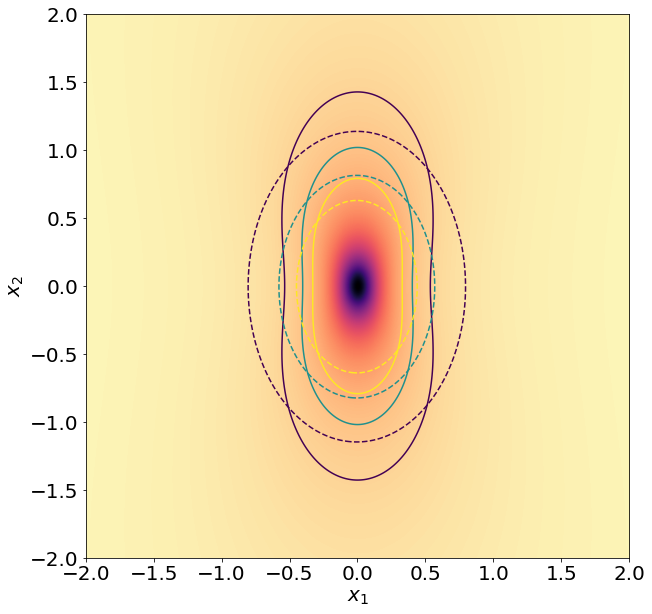

In [18]:
# create a pNIE with f and theta_c
f=0.7
kwargs={'theta_c': 0.2, 'norm': 0.7, 'ell': (1.0-f)}
size=8.0
npix=1024
el=psie(size=size,npix=npix,**kwargs)
xmin=-size/2.0
ymin=xmin
xmax=-xmin
ymax=xmax

# compare to the NIE lens created above

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.contour(el.convergence(),levels=[0.5,0.7,0.9],
           extent=[xmin,xmax,ymin,ymax])
ax.contour(df.convergence(),linestyles='dashed',levels=[0.5,0.7,0.9],
           extent=[xmin,xmax,ymin,ymax])
ax.imshow(el.convergence(),origin='lower',
          extent=[xmin,xmax,ymin,ymax],cmap='magma_r')


ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',fontsize=20)

The figure shows some contour levels of the convergence map of a PNIE lens with $f=0.7$ (solid lines). The dashed lines show the  contours in the case of the NIE lens with the same $f$. Note that: 1) the ellipticities are not comparable: in the case of the PNIE lens $f$ is the axis ratio of elliptical iso-potential contours. The corresponding convergence is much more elongated; 2) the iso-convergence contours are not elliptical. The contours have dumbbell shapes.

# Multiple images

The following code allows to compute multiple images of sources placed at any position on the source plane. It allows also to assign to each source properties as size, brightness (Sersic) profile, and ellipticity and to visualize via ray-tracing the resulting distortions of the images.

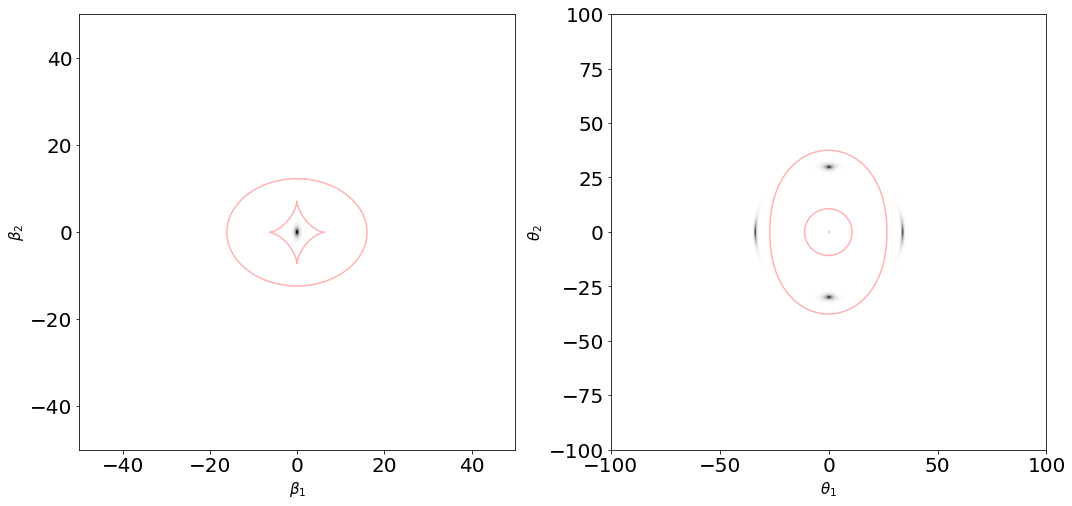

In [36]:
%matplotlib inline 
%matplotlib inline 
#%matplotlib notebook 
#%matplotlib notebook 

fp=0.9
#fp=0.6

# create a PNIE lens (PSIE with core). The keyword 'norm' specify the size (mass) of the deflector
kwargs_lens_true={'theta_c':10.0, 'norm': 35.0*fp, 'ell': 1-fp, 'pa': np.pi/2.}
#kwargs_lens_true={'theta_c':0.0, 'norm': 35.0*fp, 'ell': 1-fp, 'pa': 3*np.pi/4.}

size=200.0  # size of the FOV
npix=1024 # n of pixels covering the FOV
df_true=psie(size=size,npix=npix,**kwargs_lens_true)

fig,ax=plt.subplots(1,2,figsize=(15,8))


ax[0].set_xlim([-size/4.,size/4.])
ax[0].set_ylim([-size/4.,size/4.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

    
# now define the unlensed source and the corresponding lensed version
kwargs_source={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': 0, 'ys2': 0}
#kwargs_source={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': 1.75, 'ys2': 2.39}
#kwargs_source={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': 8.05, 'ys2': 7.15}
#kwargs_source={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': 10.05, 'ys2': 9.15}
#kwargs_source={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': 0, 'ys2': 4.9}

#kwargs_source={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': 0, 'ys2': 29}
#kwargs_source={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': 5.9, 'ys2': 13.8}
#kwargs_source={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': -0.1, 'ys2': 0.1}

se_unlensed=sersic(size,npix,**kwargs_source)
se=sersic(size,npix,gl=df_true,**kwargs_source)

# find the location of the multiple images via grid searching
xi1,xi2=df_true.find_images(kwargs_source['ys1'],kwargs_source['ys2'])

# save images of the lensed source and of its images in separate arrays
image_lensed=se.image
image_unlensed=se_unlensed.image

# adding another 2 sources...
#kwargs_source2={'q': 1.0,'re': 0.2, 'pa': np.pi, 'n': 1,
#                'ys1': kwargs_source['ys1']+0.0, 
#                'ys2': kwargs_source['ys2']-0.0}
#se_unlensed=sersic(size,npix,**kwargs_source2)
#se=sersic(size,npix,gl=df_true,**kwargs_source2)
#image_lensed=image_lensed+se.image
#image_unlensed=image_unlensed+se_unlensed.image


# plot the results
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)


#--- TO BE UNCOMMENTED 1---
ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
df_true.clines(ax=ax[1],alpha=0.3)
df_true.caustics(ax=ax[0],alpha=0.3)

 
#--- TO BE UNCOMMENTED 2---
#ax[1].plot(xi1,xi2,'o',color='red',alpha=0.6)
plt.tight_layout()

/Users/massimo/projects/LensingLectures/Notebooks/mynewdeflector.py:203: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(surf, cmap=cmap,levels=levels,


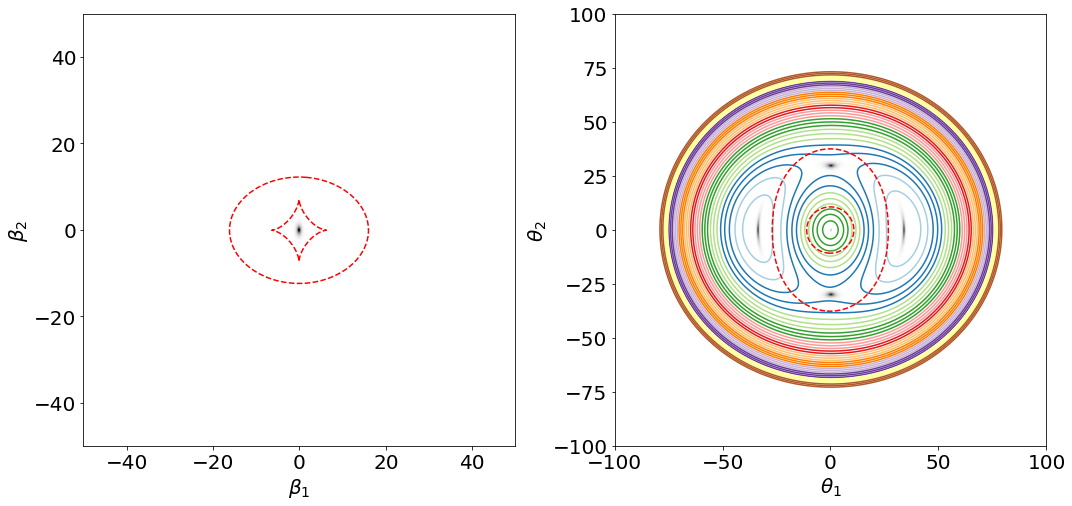

In [37]:
label_size = 15
matplotlib.rcParams['xtick.labelsize'] = label_size
matplotlib.rcParams['ytick.labelsize'] = label_size

xmin,xmax=-df_true.size/2,df_true.size/2
ymin,ymax=-df_true.size/2,df_true.size/2

nima=0
beta=[kwargs_source['ys1'],kwargs_source['ys2']]
fig,ax=plt.subplots(1,2,figsize=(15,8))

ax[0].set_xlim([-size/4.,size/4.])
ax[0].set_ylim([-size/4.,size/4.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

td=df_true.t_delay_surf(beta=beta)

df_true.caustics(ax=ax[0],lt='--',alpha=1.0,fontsize=20)
df_true.clines(ax=ax[1],lt='--',alpha=1.0,fontsize=20)
ax[0].imshow(se_unlensed.image,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r')
ax[1].imshow(se.image,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r')
df_true.show_contours(td,ax=ax[1],minx=xmin,miny=ymin,nlevels=35,levmax=1000,fontsize=20)
fig.tight_layout()

# External perturbations

It is often necessary to embed a lens into an external shear to account for matter in the lens surroundings. A useful approach is to model this shear by means of a
potential $\Psi_\gamma$, which must satisfy the following conditions:
$$
  \gamma_1 = \frac{1}{2}(\Psi_{11}-\Psi_{22}) = \mathrm{const.} \;,
$$
$$
  \gamma_2 = \Psi_{12} = \mathrm{const.} \;,
$$
$$
  \kappa = \frac{1}{2}(\Psi_{11}+\Psi_{22}) = \mathrm{const.} \;.
$$
If  $\Psi_{11}\pm\Psi_{22}$ are required to be constant, $\Psi_{11}$ and
$\Psi_{22}$ must separately be constants, thus
$$
  \Psi_\gamma(\vec x)=Cx_1^2+C'x_2^2+Dx_1x_2 + E \;.
$$
By differentiating, we obtain that 
$$
  \frac{1}{2}(\Psi_{11}-\Psi_{22}) = C-C' = \gamma_1 \;,
$$
$$
  \Psi_{12} = D=\gamma_2 \;,
$$
$$
  \frac{1}{2}(\Psi_{11}+\Psi_{22}) = C+C' = \kappa \;.
$$
Imposing $\kappa=0$, we obtain
$$
  C=-C' \; \; \Rightarrow \; \; C=\frac{\gamma_1}{2} \;.
$$
Therefore,
$$
  \Psi_\gamma(\vec x)=\frac{\gamma_1}{2}(x_1^2-x_2^2)+\gamma_2x_1x_2 \;.
$$
If $\phi_\gamma$ is the angle defining the direction of the external shear (or better the direction of the eigenvectors of the shear with eigenvalue $\gamma$), i.e.
$$
\gamma_1 = \gamma\cos2\phi_\gamma \nonumber \;,
$$
$$
\gamma_2 = \gamma\sin2\phi_\gamma  \;,
$$
then, in polar coordinates,
$$
\Psi_\gamma(\vec x)=\frac{\gamma}{2}x^2\cos2(\phi-\phi_\gamma)\;.
$$

Likewise, if the lens is embedded in a sheet of constant surface-mass density producing no shear,  we find
$$
  \Psi_\kappa = \frac{\kappa}{2}(x_1^2+x_2^2)= \frac{\kappa}{2}x^2\;.
$$
Irrelevant constants have been omitted in the equations above.

The deflection angle of a sheet of constant surface-mass density is
$$
  \vec \alpha = \vec \nabla \Psi_\kappa = \kappa \vec x \;.
$$
Thus, the lens equation reads, in this case,
$$
  \vec y= \vec x- \vec \alpha = \vec x (1-\kappa) \;.
$$
If $\kappa=1$, $y=0$ for all images, i.e. this sheet focuses all light rays
exactly on the origin. This gravitational lens thus has a well-defined focal point.

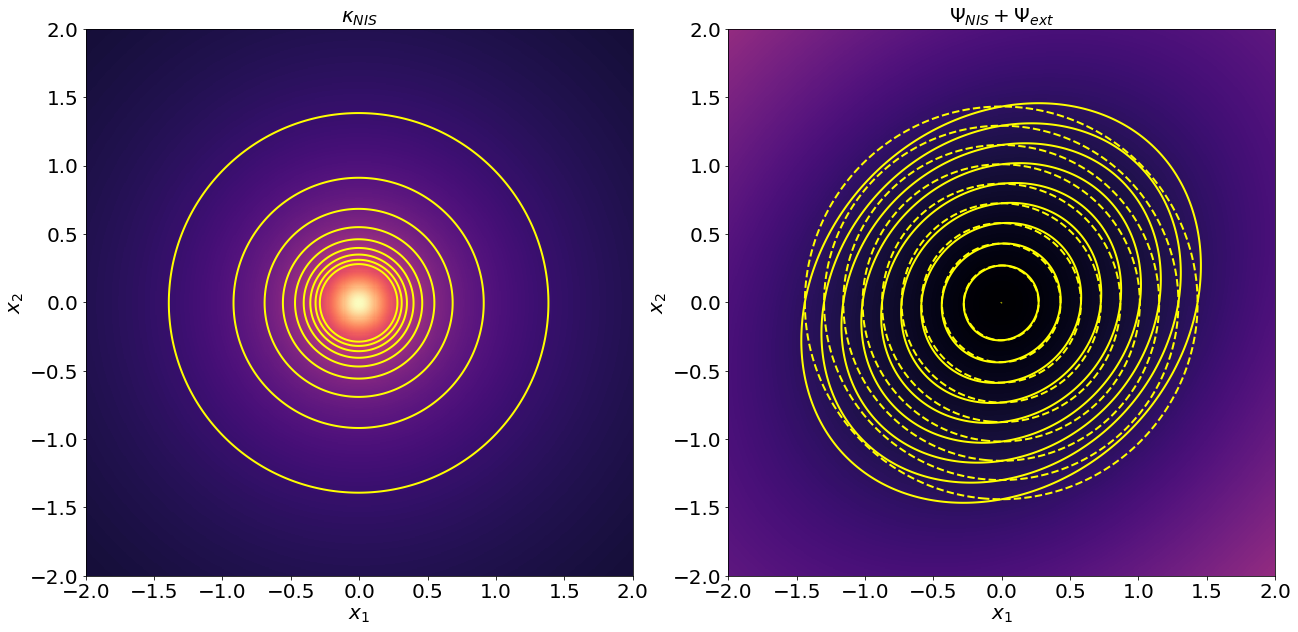

In [15]:
from mynewdeflector import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm
%matplotlib inline

size=8.0
npix=1024
xmin=-size/2.0
ymin=xmin
xmax=-xmin
ymax=xmax

def psi_extg(xk,yk,g1,g2):
    x1_,x2_=np.meshgrid(xk,yk) # lens plane mesh
    psi_g=g1/2.0*(x1_**2-x2_**2)+g2*x1_*x2_
    return(psi_g)

f=1.0 
npix=1024
'''
the angle phi_g defines the direction of the shear
'''
phi_g=45.0
'''
g is the amplitude of the shear
'''
g=0.1
'''
g1, g2 are the two components of g
'''
g1=-g*np.cos(2.0*phi_g*np.pi/180.0)
g2=-g*np.sin(2.0*phi_g*np.pi/180.0)

xk=np.linspace(xmin,xmax,npix)
yk=np.linspace(ymin,ymax,npix)

kwargs={'theta_c': 0.2, 'norm': 0.8, 'ell': 0.0}
size=xmax-xmin
el=psie(size=size,npix=npix,**kwargs)

psi_ext=psi_extg(xk,yk,g1,g2)

fig,ax=plt.subplots(1,2,figsize=(18,10))
ax[0].imshow(np.sqrt(el.convergence()),origin='low',extent=[xmin,xmax,ymin,ymax],cmap='magma')

levels=np.linspace(np.min(el.convergence())+0.1,np.min(el.convergence())+1.5,10)
cst=ax[0].contour(el.convergence(),levels=levels,colors='yellow',linewidths=2,extent=[xmin,xmax,ymin,ymax])

ax[1].imshow(el.pot+psi_ext,origin='low',extent=[xmin,xmax,ymin,ymax],cmap='magma')

levels=np.linspace(np.min(el.pot),np.min(el.pot)+1,10)
cst=ax[1].contour(el.pot+psi_ext,levels=levels,colors='yellow',linewidths=2,extent=[xmin,xmax,ymin,ymax])
cst=ax[1].contour(el.pot,linestyles='dashed',levels=levels,colors='yellow',linewidths=2,extent=[xmin,xmax,ymin,ymax])
ax[0].set_xlim([-2,2])
ax[0].set_ylim([-2,2])
ax[1].set_xlim([-2,2])
ax[1].set_ylim([-2,2])

for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')
    
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)    

ax[0].set_title(r'$\kappa_{NIS}$',fontsize=20)
ax[1].set_title(r'$\Psi_{NIS}+\Psi_{ext}$',fontsize=20)
fig.tight_layout()
fig.savefig('external_shear.pdf',bbox_inches='tight',dpi=150)

We can verify that the perturbed lens still has an axially symmetric convergence: 

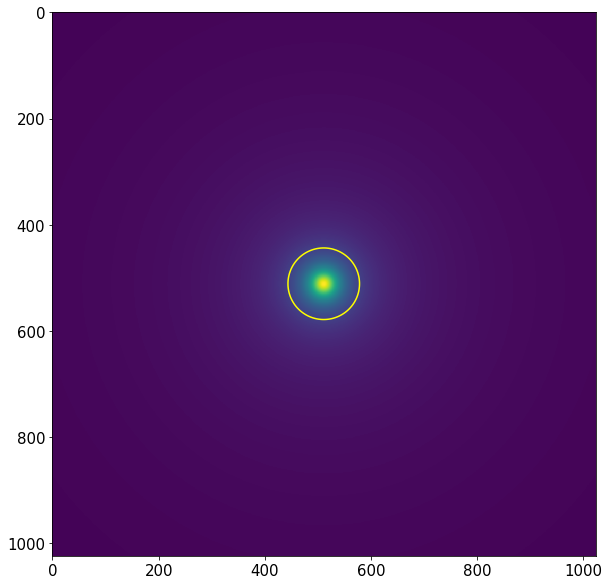

In [16]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
psi=el.pot+psi_ext
a2,a1=np.gradient(psi)
a21,a11=np.gradient(a1)
a22,a12=np.gradient(a2)

kappa=0.5*(a11+a22)

ax.imshow(kappa)
ax.contour(kappa,levels=[np.max(kappa)/5],colors='yellow')

Now, we visualize the critical lines and caustics:

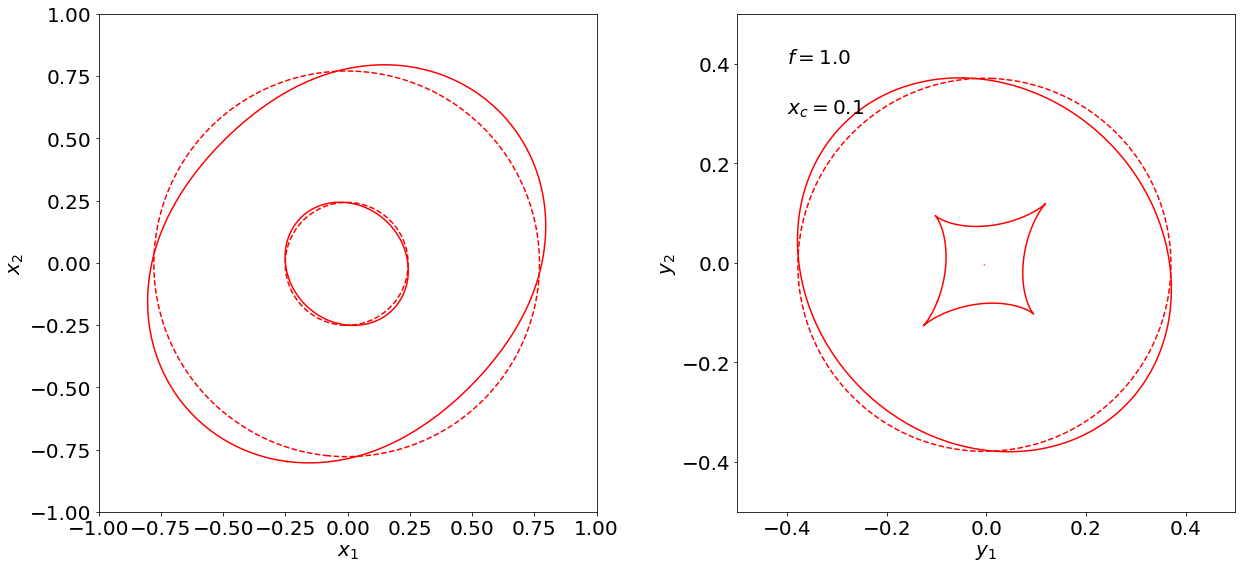

In [52]:
fig,ax=plt.subplots(1,2,figsize=(18,8))

# critical lines and caustics on the unperturbed NIS
el.clines(ax=ax[0],lt="--")
el.caustics(ax=ax[1],lt='--')

# now combining the unperturbed potential and the external shear potential 
pixel=size/(npix-1)
pert_el=deflector_from_potential(el.pot+psi_ext,
                                 size=size,npix=npix)

# visualize the critical lines and caustics
pert_el.clines(ax=ax[0])
pert_el.caustics(ax=ax[1])

        
ax[1].set_xlim([-0.5,0.5])
ax[1].set_ylim([-0.5,0.5])
ax[0].set_xlim([-1,1])
ax[0].set_ylim([-1,1])
                      
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

ax[1].text(-0.4,0.4,'$f=$'+str(f),fontsize=20)
ax[1].text(-0.4,0.3,'$x_c=$'+str(xc),fontsize=20)
plt.tight_layout()

We note that the addition of  an external shear to an axially symmetric lens causes the critical lines and caustics to become very similar to what we'd obtain with an elliptical lens.

# Multiple mass components

Very often, gravitational lenses cannot be described with smooth mass distributions composed by a single mass clump. When this is the case, it is often convenient to treat the lens as a hierarchy of masses. The largest mass components, which we may refer to as {\em macro-lenses}, are responsible of the largest-scales lensing effects, often the most easy to identify and measure. On the contrary, the smallest mass clumps within the macro-lenses may be referred to as {\em substructures} and act as perturbers of the macro-lens. 

The superposition principle allows to compute the total potential of the lens as the sum of the potentials of the individual mass components. Thus, the total potential of a lens composed by $n_{smooth}$ smooth large-scale mass components and by $n_{sub}$ small-scale mass clumps can be written as
$$
    \Psi(\vec x) = \sum_{i=1}^{n_{smooth}} \Psi_{smooth,i}(\vec x-\vec x_{smooth,i})+\sum_{i=1}^{n_{sub}} \Psi_{sub,i}(\vec x -\vec x_{sub,i}) \;,
$$
where $\Psi_{smooth,i}$ and $\Psi_{sub,i}$ are the lensing potentials of the $i$-th large- and small-scale mass clumps at positions $\vec x_{smooth,i}$ and $\vec x_{sub,i}$, respectively.

In case of lenses embedded in some external perturbation described by a potential $\Psi_{ext}$, we can further add it to the potential in the Eq. above:
$$
    \tilde\Psi(\vec x)=\Psi(\vec x)+\Psi_{ext}(\vec x) \;.
$$

Lens properties such as the deflection angle, the convergence, and the shear can be computed as usual by taking the first and second derivatives of the lensing potential and by combining them.

Here is an example. We generate a number of substructures to be randomly distributed on the top of a NIE model. These substructures are scaled-down versions of the lens within which they are distributed.

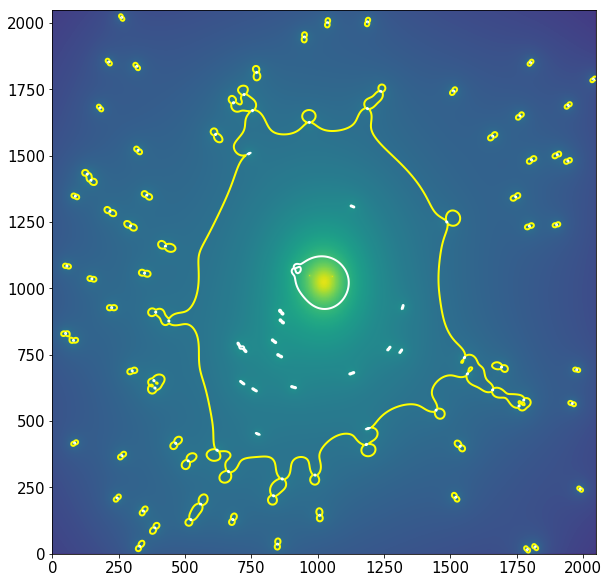

In [21]:
"""
Main lens:
"""
kwargs={'theta_c': 5.0, 'norm': 30.0, 'ell': 0.1}
size=200.0
npix=2048.0
main_lens=psie(size=size,npix=npix,**kwargs)

"""
substructures
"""
n_pert=100

np.random.seed(3121233)
xsub=(np.random.random_sample(n_pert)-0.5)*size
ysub=(np.random.random_sample(n_pert)-0.5)*size

fsub=np.random.random_sample(n_pert)
pa=np.random.random_sample(n_pert)*2.0*np.pi

pot=main_lens.pot
for i in range(n_pert):
    kwargs={'theta_c': 0.0, 'norm': 0.5, 'ell': 0.0, 'pa': pa[i]}
    sub_lens=psie(x0=xsub[i],y0=ysub[i],size=size,npix=npix,**kwargs)
    pot=pot+sub_lens.pot

df=deflector_from_potential(pot=pot,size=size,npix=npix)

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(df.convergence(),origin='low',norm=LogNorm())
g1,g2=df.shear()
lambdat=1.0-df.convergence()-np.sqrt(g1*g1+g2*g2)
lambdar=1.0-df.convergence()+np.sqrt(g1*g1+g2*g2)
cst=ax.contour(lambdat,levels=[0.0],colors='yellow',linewidths=2)
ax.imshow(lambdar,origin='low',alpha=0)
csr=ax.contour(lambdar,levels=[0.0],colors='white',linewidths=2)

As we can see, smaller, secondary critical lines appear around substructures in addition to the longer critical line surrounding the main lens. In addition, those substructures that are close to the main critical line produce resonant critical lines (secondary critical lines merging with the main one). Obviously, the caustic structure will also be affected by the substructures.
What kind of signatures do we expect in the images of background sources? We can consider few examples.
In the first, we consider a source near the cusp of the tangential caustic of a large lens (e.g. a galaxy cluster). In the case of a smooth lens, we'd expect to observe a large tangential arc. However, if the main caustic is locally perturbed by a substructure then additional local curvatures may be appear in the arc, which could also be shifted away.

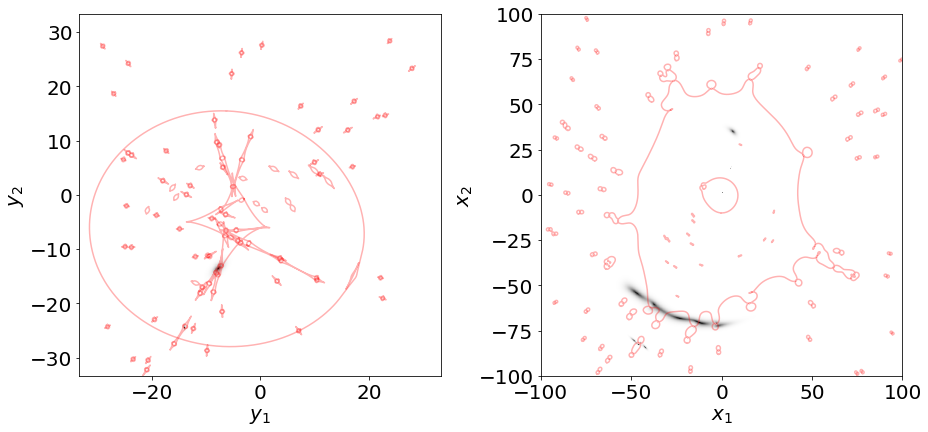

In [22]:
#%matplotlib notebook 
#%matplotlib notebook

%matplotlib inline 
%matplotlib inline 


fig,ax=plt.subplots(1,2,figsize=(13,8))

df.clines(ax=ax[1],alpha=0.3)
df.caustics(ax=ax[0],alpha=0.3)

        
ax[0].set_xlim([-size/6.,size/6.])
ax[0].set_ylim([-size/6.,size/6.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

kwargs={'q': 0.5,'re': 0.3, 'pa': np.pi, 'n': 1,'ys1': -13.9, 'ys2': -24.4}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df,**kwargs)

image_lensed=se.image
image_unlensed=se_unlensed.image

#fig,ax=plt.subplots(1,2,figsize=(18,8))
#ax[0].imshow(se_unlensed.image,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
#ax[1].imshow(se.image,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 

kwargs={'q': 0.5,'re': 1.0, 'pa': -np.pi/4, 'n': 1,'ys1': -7.7, 'ys2': -13.5}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df,**kwargs)



image_lensed=image_lensed+se.image
image_unlensed=image_unlensed+se_unlensed.image
#fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 
 
plt.tight_layout()

<IPython.core.display.Javascript object>


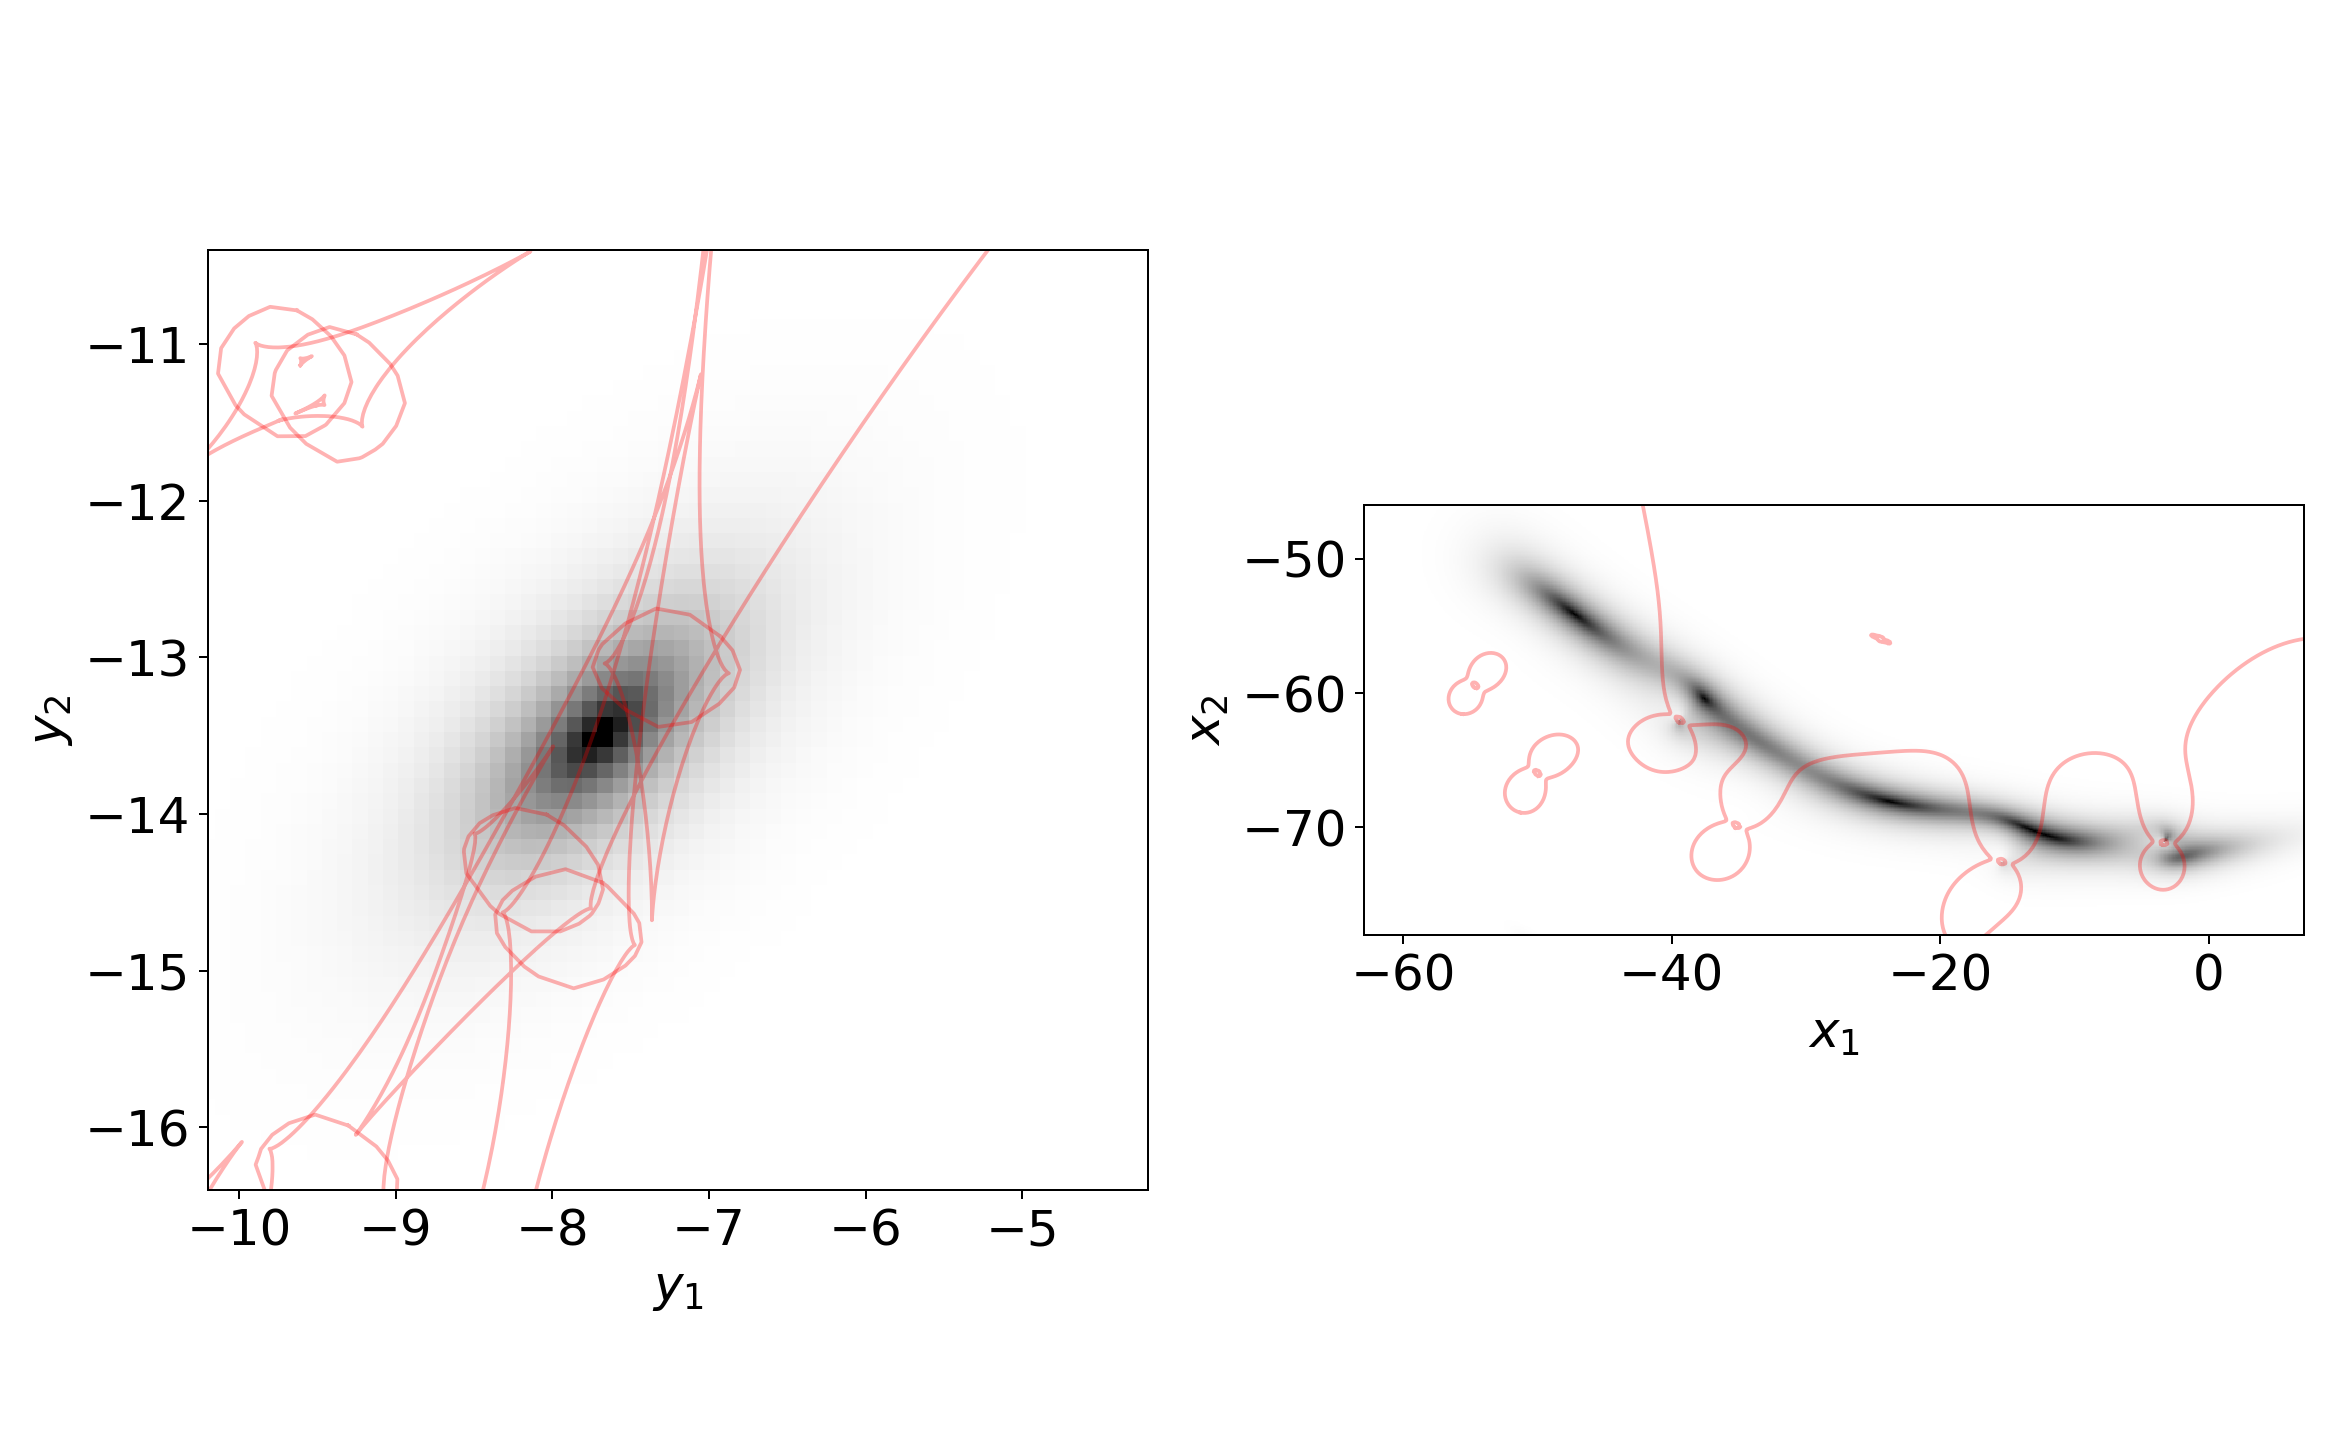

In [42]:


%matplotlib notebook 
%matplotlib notebook


fig,ax=plt.subplots(1,2,figsize=(13,8))

df.clines(ax=ax[1],alpha=0.3)
df.caustics(ax=ax[0],alpha=0.3)

        
ax[0].set_xlim([-7.2-3,-7.2+3])
ax[0].set_ylim([-13.4-3,-13.4+3])
ax[1].set_xlim([-27.9-35,-27.9+35])
ax[1].set_ylim([-66-12,-66+20])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

kwargs={'q': 0.5,'re': 0.3, 'pa': np.pi, 'n': 1,'ys1': -13.9, 'ys2': -24.4}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df,**kwargs)

image_lensed=se.image
image_unlensed=se_unlensed.image

#fig,ax=plt.subplots(1,2,figsize=(18,8))
#ax[0].imshow(se_unlensed.image,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
#ax[1].imshow(se.image,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 

kwargs={'q': 0.5,'re': 1.0, 'pa': -np.pi/4, 'n': 1,'ys1': -7.7, 'ys2': -13.5}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df,**kwargs)



image_lensed=image_lensed+se.image
image_unlensed=image_unlensed+se_unlensed.image
#fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 
 
plt.tight_layout()

In this example a second source was placed just inside the cluster radial critical curve, in the lower left quadrant of the source plane. The source is lensed by the cluster to form three images. Two embrace the radial ceritical line in the upper right quadrant of the lens plane. The third image is external to the tangential critical line in the lower left quadrant of the lens plane. However, the source also overlaps with a substructure' caustics. In the zoomed in image in the left panel below, we can notice that the source is in fact contained by two caustics. Applying the usual rule that after crossing a caustic (moving inward!) the multiplicity of the images increases by two units, we expect the source to have not 3 but 7 images! 

Indeed, the figure in the right panel shows that the third image is actually split into 5 multiple images (one is located at the center of the critical line of the substructure and is indeed very demagnified).  

<IPython.core.display.Javascript object>


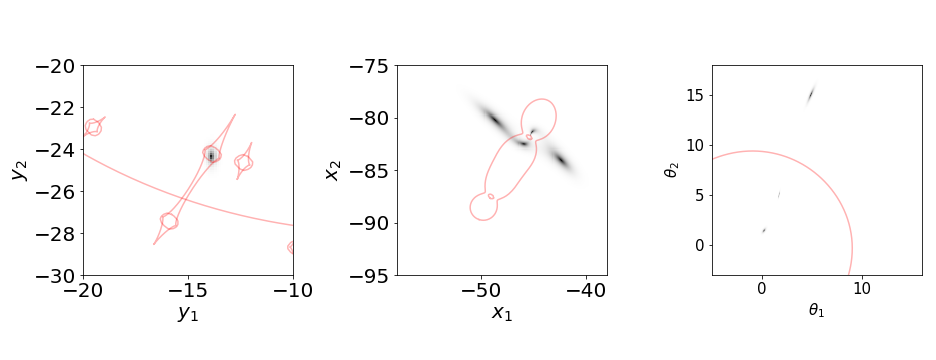

In [140]:
fig,ax=plt.subplots(1,3,figsize=(13,5))
df.clines(ax=ax[1],alpha=0.3)
df.clines(ax=ax[2],alpha=0.3)
df.caustics(ax=ax[0],alpha=0.3)

        
ax[0].set_xlim([-20.,-10.])
ax[0].set_ylim([-30.,-20.])
ax[1].set_xlim([-58.,-38.])
ax[1].set_ylim([-95.,-75.])
ax[2].set_xlim([-5.,16.])
ax[2].set_ylim([-3.,18.])                      
    
    
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')
    
ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[2].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
plt.tight_layout()